<a href="https://colab.research.google.com/github/Beaterxd/Beaterxd/blob/main/Prepare_Predict_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28627 sha256=53f63825ebe737702e514c3a52403eb83315c01b7966320cf4176599d62e06ca
  Stored in directory: /root/.cache/pip/wheels/32/a3/b6/b5b33187f2d42f095fecc236b957b46173fa09e78a106e309f
Successfully built yahoofinancials


Install

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files

uploaded = files.upload()

Saving TickerList.xlsx to TickerList.xlsx


In [4]:
ticker = pd.read_excel("TickerList.xlsx")

In [5]:
ticker

,Ticker,Description
0,GC=F,Gold
1,SI=F,Silver
2,CL=F,Crude Oil
3,^GSPC,S&P500
4,^RUT,Russel 2000 Index
5,ZN=F,10 Yr US T-Note futures
6,ZT=F,2 Yr US T-Note Futures
7,PL=F,Platinum
8,HG=F,Copper
9,DX=F,Dollar Index


In [6]:
names = ticker['Description'].to_list()
ticker = ticker['Ticker'].to_list()
yahoo_Fianancials = YahooFinancials(ticker)
end_date= '2022-03-01'
start_date = '2010-01-01'
data = yahoo_Fianancials.get_historical_price_data(start_date, end_date, 'daily')
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [7]:
for i in ticker:
    aapl_df = pd.DataFrame(data[i]['prices'])[['formatted_date', 'adjclose']]
    aapl_df.columns = ['Date1', i]
    aapl_df['Date1'] = pd.to_datetime(aapl_df['Date1'])
    values = values.merge(aapl_df,how='left',left_on='Date',right_on='Date1')
    values = values.drop('Date1', axis=1)

In [8]:
names.insert(0,'Date')
values.columns = names
cols=values.columns.drop('Date')
values[cols] = values[cols].apply(pd.to_numeric,errors='coerce').round(decimals=1)

In [9]:
values

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN
1,2010-01-04,1117.7,17.4,81.5,1133.0,640.1,115.5,108.3,1517.3,3.4,77.8,20.0,32.7,1.4,697.0,2308.4
2,2010-01-05,1118.1,17.8,81.8,1136.5,638.5,116.2,108.4,1530.8,3.4,77.8,19.4,32.9,1.4,697.6,2308.7
3,2010-01-06,1135.9,18.2,83.2,1137.1,638.0,116.0,108.4,1552.2,3.5,77.7,19.2,33.0,1.4,698.3,2301.1
4,2010-01-07,1133.1,18.3,82.7,1141.7,642.0,115.8,108.4,1553.0,3.4,78.1,19.1,32.8,1.4,697.8,2300.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,2022-02-23,1909.2,24.6,92.1,4225.5,1944.1,126.3,107.6,1090.1,4.5,96.2,31.0,46.4,1.1,1275.6,13037.5
3169,2022-02-24,1925.1,24.7,92.8,4288.7,1996.0,126.5,107.7,1060.4,4.5,97.1,30.3,45.4,1.1,1236.5,13473.6
3170,2022-02-25,1886.5,24.0,91.6,4384.6,2040.9,126.2,107.6,1048.9,4.5,96.6,27.6,46.2,1.1,1275.8,13694.6
3171,2022-02-28,1899.4,24.4,95.7,4373.9,2048.1,127.5,108.0,1037.8,4.4,96.7,30.1,45.6,1.1,1268.8,13751.4


In [10]:
result = values.fillna(method="ffill", axis=0)
result = result.fillna(method="bfill", axis=0)

In [11]:
result.isnull().sum()

Date                       0
Gold                       0
Silver                     0
Crude Oil                  0
S&P500                     0
Russel 2000 Index          0
10 Yr US T-Note futures    0
2 Yr US T-Note Futures     0
Platinum                   0
Copper                     0
Dollar Index               0
Volatility Index           0
MSCI EM ETF                0
Euro USD                   0
Euronext100                0
Nasdaq                     0
dtype: int64

In [12]:
result

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,2010-01-01,1117.7,17.4,81.5,1133.0,640.1,115.5,108.3,1517.3,3.4,77.8,20.0,32.7,1.4,697.0,2308.4
1,2010-01-04,1117.7,17.4,81.5,1133.0,640.1,115.5,108.3,1517.3,3.4,77.8,20.0,32.7,1.4,697.0,2308.4
2,2010-01-05,1118.1,17.8,81.8,1136.5,638.5,116.2,108.4,1530.8,3.4,77.8,19.4,32.9,1.4,697.6,2308.7
3,2010-01-06,1135.9,18.2,83.2,1137.1,638.0,116.0,108.4,1552.2,3.5,77.7,19.2,33.0,1.4,698.3,2301.1
4,2010-01-07,1133.1,18.3,82.7,1141.7,642.0,115.8,108.4,1553.0,3.4,78.1,19.1,32.8,1.4,697.8,2300.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,2022-02-23,1909.2,24.6,92.1,4225.5,1944.1,126.3,107.6,1090.1,4.5,96.2,31.0,46.4,1.1,1275.6,13037.5
3169,2022-02-24,1925.1,24.7,92.8,4288.7,1996.0,126.5,107.7,1060.4,4.5,97.1,30.3,45.4,1.1,1236.5,13473.6
3170,2022-02-25,1886.5,24.0,91.6,4384.6,2040.9,126.2,107.6,1048.9,4.5,96.6,27.6,46.2,1.1,1275.8,13694.6
3171,2022-02-28,1899.4,24.4,95.7,4373.9,2048.1,127.5,108.0,1037.8,4.4,96.7,30.1,45.6,1.1,1268.8,13751.4


In [13]:
result.corr()

<ipython-input-13-4adbc9422f8b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result.corr()


,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
Gold,1.000000,0.655322,0.132903,0.423640,0.323372,0.710189,0.425878,0.118505,0.570670,-0.158211,0.379617,0.553944,0.105692,0.171852,0.506499
Silver,0.655322,1.000000,0.605598,-0.248188,-0.274963,0.271347,0.537692,0.722589,0.737433,-0.702329,0.176139,0.112981,0.611057,-0.412945,-0.163187
Crude Oil,0.132903,0.605598,1.000000,-0.435427,-0.394208,-0.261798,0.292903,0.802946,0.653102,-0.855223,-0.160489,-0.067103,0.812819,-0.482767,-0.406339
S&P500,0.423640,-0.248188,-0.435427,1.000000,0.975857,0.322080,-0.223594,-0.688580,0.097038,0.632648,0.001048,0.824566,-0.548839,0.946577,0.989413
Russel 2000 Index,0.323372,-0.274963,-0.394208,0.975857,1.000000,0.217553,-0.282277,-0.678783,0.093208,0.619665,-0.126521,0.836981,-0.524563,0.959322,0.954718
10 Yr US T-Note futures,0.710189,0.271347,-0.261798,0.322080,0.217553,1.000000,0.603548,-0.136557,0.007888,0.150316,0.326108,0.193687,-0.212581,0.116048,0.375217
2 Yr US T-Note Futures,0.425878,0.537692,0.292903,-0.223594,-0.282277,0.603548,1.000000,0.546558,0.338890,-0.466370,0.250277,-0.123547,0.414091,-0.380248,-0.137464
Platinum,0.118505,0.722589,0.802946,-0.688580,-0.678783,-0.136557,0.546558,1.000000,0.586309,-0.928723,0.031957,-0.281958,0.846991,-0.742896,-0.623024
Copper,0.570670,0.737433,0.653102,0.097038,0.093208,0.007888,0.338890,0.586309,1.000000,-0.602546,0.069825,0.506568,0.578381,-0.022297,0.175035
Dollar Index,-0.158211,-0.702329,-0.855223,0.632648,0.619665,0.150316,-0.466370,-0.928723,-0.602546,1.000000,-0.056375,0.200501,-0.944947,0.716447,0.567097


<ipython-input-14-1560a6ffbe72>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result_correlation = result.corr()


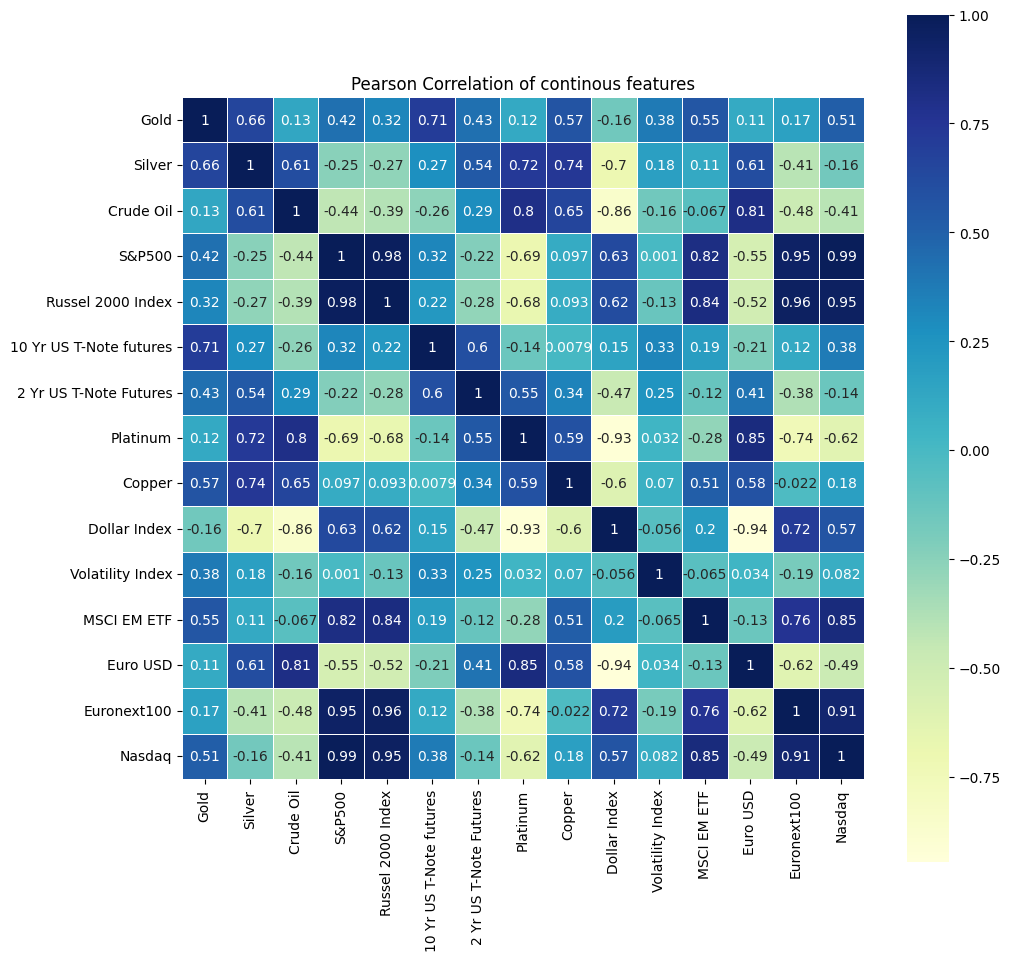

In [14]:
result_correlation = result.corr() 
plt.subplots(figsize=(11, 11))
plt.title('Pearson Correlation of continous features')
ax = sns.heatmap(result_correlation, 
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu",
                 square=True
                );

In [15]:
X_train = result.drop('Gold', axis=1)

In [16]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [17]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

<ipython-input-16-51bb6761cb8d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


5

In [18]:
cols=result[['Date','Gold','Silver','10 Yr US T-Note futures','Copper','MSCI EM ETF','Nasdaq','S&P500','2 Yr US T-Note Futures']]

In [19]:
imp = cols.columns.drop('Date')

# Calculating Short term -Historical Returns
change_days = [1,3,5,14,21]

data = pd.DataFrame(data=values['Date'])
for i in change_days:
 print(data.shape)
 x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
 data=pd.concat(objs=(data,x),axis=1)
 x=[]
print(data.shape)

# Calculating Long term Historical Returns
change_days = [60,90,180,250]

for i in change_days:
 print(data.shape)
 x= result[imp].pct_change(periods=i).add_suffix('-T-'+str(i))
 data=pd.concat(objs=(data,x),axis=1)
 x=[]
print(data.shape)

(3173, 1)
(3173, 6)
(3173, 11)
(3173, 16)
(3173, 21)
(3173, 26)
(3173, 26)
(3173, 34)
(3173, 42)
(3173, 50)
(3173, 58)


<ipython-input-19-16c45768d4e3>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
<ipython-input-19-16c45768d4e3>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
<ipython-input-19-16c45768d4e3>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
<ipython-input-19-16c45768d4e3>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
<ipython-input-19-16c45768d4e3>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a 

In [20]:
values = result
#Calculating Moving averages for Gold
moving_avg = pd.DataFrame(values['Date'],columns=['Date'])
moving_avg['Date']=pd.to_datetime(moving_avg['Date'],format='%Y-%b-%d')
#Adding Simple Moving Average
moving_avg['Gold/15SMA'] = (values['Gold']/(values['Gold'].rolling(window=15).mean()))-1
moving_avg['Gold/30SMA'] = (values['Gold']/(values['Gold'].rolling(window=30).mean()))-1
moving_avg['Gold/60SMA'] = (values['Gold']/(values['Gold'].rolling(window=60).mean()))-1
moving_avg['Gold/90SMA'] = (values['Gold']/(values['Gold'].rolling(window=90).mean()))-1
moving_avg['Gold/180SMA'] = (values['Gold']/(values['Gold'].rolling(window=180).mean()))-1
#Adding Exponential Moving Average
moving_avg['Gold/5EMA'] = (values['Gold']/(values['Gold'].ewm(span=5,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/15EMA'] = (values['Gold']/(values['Gold'].ewm(span=15,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/50EMA'] = (values['Gold']/(values['Gold'].ewm(span=50,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/200EMA'] = (values['Gold']/(values['Gold'].ewm(span=200,adjust=True,ignore_na=True).mean()))-1
moving_avg = moving_avg.dropna(axis=0)
print(moving_avg.shape)
moving_avg.head(20)

(2994, 10)


,Date,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/5EMA,Gold/15EMA,Gold/50EMA,Gold/200EMA
179,2010-09-09,0.005005,0.020246,0.026862,0.026428,0.067496,-0.001814,0.005325,0.022180,0.047979
180,2010-09-10,0.000536,0.014916,0.023422,0.022489,0.063095,-0.003560,0.001560,0.017836,0.043737
181,2010-09-13,0.000043,0.013705,0.023840,0.022565,0.062965,-0.002055,0.001787,0.017595,0.043692
182,2010-09-14,0.017736,0.031368,0.043642,0.042295,0.083187,0.011705,0.018831,0.036167,0.063502
183,2010-09-15,0.013857,0.026901,0.040711,0.039604,0.079958,0.006191,0.014342,0.032353,0.060225
184,2010-09-16,0.016041,0.029040,0.044606,0.043462,0.083679,0.006857,0.016155,0.035105,0.063766
185,2010-09-17,0.016852,0.030028,0.047361,0.046038,0.086125,0.006503,0.016682,0.036566,0.066021
186,2010-09-20,0.017297,0.030601,0.049567,0.048336,0.088360,0.006105,0.016927,0.037727,0.067997
187,2010-09-21,0.010756,0.023189,0.043716,0.042375,0.082010,0.000609,0.010205,0.031063,0.061707
188,2010-09-22,0.022518,0.034931,0.057671,0.056019,0.096350,0.009691,0.021230,0.043624,0.075594


In [21]:
#Merging Moving Average values to the feature space
data['Date']=pd.to_datetime(data['Date'],format='%Y-%b-%d')
data = pd.merge(left=data,right=moving_avg,how='left',on='Date')
print(data.shape)
data.isna().sum()

(3173, 67)


Date                       0
Euro USD-T-1               1
Russel 2000 Index-T-1      1
Euronext100-T-1            1
Dollar Index-T-1           1
                        ... 
Gold/180SMA              179
Gold/5EMA                179
Gold/15EMA               179
Gold/50EMA               179
Gold/200EMA              179
Length: 67, dtype: int64

In [22]:
#Calculating forward returns for Target
y = pd.DataFrame(data=values['Date'])
y['Gold-T+14']=values['Gold'].pct_change(periods=-14)
y['Gold-T+22']=values['Gold'].pct_change(periods=-22)
print(y.shape)
y.isna().sum()

# Removing NAs

data = data[data['Gold-T-250'].notna()]
y = y[y['Gold-T+22'].notna()]

#Adding Target Variables
data = pd.merge(left=data,right=y,how='inner',on='Date',suffixes=(False,False))
print(data)

(3173, 3)
           Date  Euro USD-T-1  Russel 2000 Index-T-1  Euronext100-T-1  \
0    2010-12-17           0.0               0.003734        -0.003706   
1    2010-12-20           0.0               0.003592         0.004006   
2    2010-12-21           0.0               0.010482         0.010118   
3    2010-12-22           0.0               0.000127        -0.000705   
4    2010-12-23           0.0              -0.002024        -0.001412   
...         ...           ...                    ...              ...   
2896 2022-01-24           0.0               0.022939        -0.039098   
2897 2022-01-25           0.0              -0.014507         0.003742   
2898 2022-01-26           0.0              -0.013723         0.020657   
2899 2022-01-27           0.0              -0.022869         0.004033   
2900 2022-01-28           0.0               0.019262        -0.008791   

      Dollar Index-T-1  Nasdaq-T-1  Euro USD-T-3  Russel 2000 Index-T-3  \
0             0.003727    0.002161    

In [23]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.5/483.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00


In [24]:
from pycaret.regression import *

#We have two target columns. We will remove the T+14 day Target
data_22= data.drop(['Gold-T+14'],axis=1)

In [25]:
data_22

,Date,Euro USD-T-1,Russel 2000 Index-T-1,Euronext100-T-1,Dollar Index-T-1,Nasdaq-T-1,Euro USD-T-3,Russel 2000 Index-T-3,Euronext100-T-3,Dollar Index-T-3,...,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/5EMA,Gold/15EMA,Gold/50EMA,Gold/200EMA,Gold-T+22
0,2010-12-17,0.0,0.003734,-0.003706,0.003727,0.002161,0.0,0.010108,-0.007244,0.013802,...,-0.008206,-0.001550,0.012769,0.040599,0.092056,-0.003261,-0.004795,0.012105,0.075464,0.007675
1,2010-12-20,0.0,0.003592,0.004006,0.002475,0.002497,0.0,0.018090,0.002715,0.004963,...,-0.004174,0.003867,0.016733,0.044397,0.096441,0.001151,0.000163,0.016486,0.079902,0.011166
2,2010-12-21,0.0,0.010482,0.010118,0.001235,0.006793,0.0,0.017899,0.010406,0.007453,...,-0.002386,0.006348,0.017698,0.045017,0.097442,0.002066,0.001847,0.017730,0.081048,0.030969
3,2010-12-22,0.0,0.000127,-0.000705,0.000000,0.001462,0.0,0.014240,0.013450,0.003713,...,-0.003368,0.005632,0.015700,0.042594,0.095240,0.000703,0.000732,0.016038,0.079026,0.034154
4,2010-12-23,0.0,-0.002024,-0.001412,-0.003699,-0.002208,0.0,0.008564,0.007981,-0.002469,...,-0.007851,0.001260,0.009830,0.036216,0.088817,-0.002806,-0.003655,0.010618,0.072881,0.026404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,2022-01-24,0.0,0.022939,-0.039098,0.003138,0.006260,0.0,-0.014204,-0.049352,0.004188,...,0.012142,0.017587,0.018325,0.025536,0.020162,0.003927,0.010252,0.018244,0.022744,-0.035355
2897,2022-01-25,0.0,-0.014507,0.003742,0.000000,-0.022793,0.0,-0.009881,-0.052395,0.002090,...,0.016745,0.022115,0.023803,0.031171,0.026303,0.006594,0.014221,0.023350,0.028557,-0.037608
2898,2022-01-26,0.0,-0.013723,0.020657,0.005214,0.000207,0.0,-0.005735,-0.015579,0.008368,...,0.004038,0.008289,0.010587,0.018147,0.013833,-0.003870,0.001522,0.010330,0.015739,-0.030003
2899,2022-01-27,0.0,-0.022869,0.004033,0.008299,-0.013979,0.0,-0.050258,0.028607,0.013556,...,-0.016209,-0.011818,-0.009629,-0.002499,-0.006174,-0.015989,-0.016233,-0.009494,-0.004532,-0.055860


In [26]:
a=setup(data_22,target='Gold-T+22',ignore_features=['Date'],session_id=11,profile=False)

,Description,Value
0,Session id,11
1,Target,Gold-T+22
2,Target type,Regression
3,Original data shape,"(2901, 68)"
4,Transformed data shape,"(2901, 67)"
5,Transformed train set shape,"(2030, 67)"
6,Transformed test set shape,"(871, 67)"
7,Ignore features,1
8,Numeric features,66
9,Preprocess,True


In [27]:
blacklist_models = [ 'lightgbm']

In [28]:
compare_models( exclude = blacklist_models,turbo=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0110,0.0002,0.0152,0.8784,0.0137,0.9940,2.9420
knn,K Neighbors Regressor,0.0115,0.0002,0.0157,0.8696,0.0135,1.2813,0.1200
xgboost,Extreme Gradient Boosting,0.0136,0.0003,0.0183,0.8231,0.0161,1.4283,2.9160
rf,Random Forest Regressor,0.0138,0.0004,0.0187,0.8150,0.0169,1.1233,8.4910
gbr,Gradient Boosting Regressor,0.0191,0.0006,0.0250,0.6691,0.0225,1.4161,3.3810
dt,Decision Tree Regressor,0.0200,0.0010,0.0310,0.4891,0.0218,2.7407,0.5820
ada,AdaBoost Regressor,0.0285,0.0012,0.0351,0.3509,0.0309,1.6891,1.1290
lr,Linear Regression,0.0296,0.0015,0.0391,0.1976,0.0314,2.1310,0.7250
br,Bayesian Ridge,0.0299,0.0016,0.0395,0.1805,0.0318,2.0343,0.2700
ridge,Ridge Regression,0.0305,0.0016,0.0401,0.1537,0.0332,1.6929,0.1060


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=11)

In [29]:
#create_model

In [30]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0123,0.0003,0.0170,0.8399,0.0152,1.0187
1,0.0112,0.0003,0.0160,0.8654,0.0148,0.4458
2,0.0114,0.0002,0.0156,0.8660,0.0144,1.9622
3,0.0097,0.0002,0.0136,0.8990,0.0123,0.6190
4,0.0102,0.0002,0.0142,0.9049,0.0128,0.8885
5,0.0115,0.0002,0.0151,0.8885,0.0139,0.9984
6,0.0110,0.0002,0.0151,0.8814,0.0137,1.0874
7,0.0113,0.0003,0.0160,0.8854,0.0145,0.5937
8,0.0106,0.0002,0.0149,0.8748,0.0134,1.1817


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0124,0.0003,0.0178,0.8248,0.0144,0.8651
1,0.0120,0.0002,0.0158,0.8686,0.0140,0.8605
2,0.0114,0.0002,0.0156,0.8654,0.0132,1.5520
3,0.0111,0.0002,0.0150,0.8767,0.0134,0.9649
4,0.0116,0.0002,0.0156,0.8847,0.0138,1.3034
5,0.0121,0.0003,0.0162,0.8709,0.0133,1.1899
6,0.0104,0.0002,0.0146,0.8884,0.0131,1.1999
7,0.0119,0.0003,0.0161,0.8847,0.0145,0.7503
8,0.0117,0.0003,0.0162,0.8533,0.0134,2.3463


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0149,0.0004,0.0199,0.7821,0.0179,1.0663
1,0.0136,0.0003,0.0185,0.8193,0.0169,0.6210
2,0.0145,0.0004,0.0196,0.7862,0.0177,2.3851
3,0.0126,0.0003,0.0170,0.8420,0.0153,0.7865
4,0.0140,0.0004,0.0190,0.8296,0.0171,0.9551
5,0.0140,0.0004,0.0191,0.8203,0.0175,1.1071
6,0.0132,0.0003,0.0179,0.8329,0.0165,1.1312
7,0.0146,0.0004,0.0205,0.8125,0.0180,0.7094
8,0.0137,0.0004,0.0189,0.7988,0.0170,1.2146


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
#tune model

In [34]:
knn_tuned = tune_model(knn, n_iter=150)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0102,0.0002,0.0155,0.8671,0.0122,0.8725
1,0.0097,0.0002,0.0133,0.9065,0.0120,0.5772
2,0.0093,0.0002,0.0127,0.9103,0.0116,2.1741
3,0.0084,0.0001,0.0114,0.9295,0.0102,0.6443
4,0.0089,0.0002,0.0132,0.9178,0.0118,0.8473
5,0.0102,0.0002,0.0139,0.9053,0.0124,1.1282
6,0.0085,0.0001,0.0115,0.9308,0.0103,1.1781
7,0.0105,0.0002,0.0142,0.9105,0.0119,0.6693
8,0.0100,0.0002,0.0138,0.8927,0.0113,1.2247


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [35]:
#Evaluate Model

In [36]:
#plot_model(knn_tuned, plot = 'feature')

In [37]:
#plot_model(et, plot = 'feature')

In [38]:
#Removing Outliers

In [39]:
# b=setup(data_22,target='Gold-T+22', ignore_features=['Date'], session_id=11,profile=False,remove_outliers=True);
b = setup(data_22,target='Gold-T+22',ignore_features=['Date'],session_id=11,profile=False,remove_outliers=True)

,Description,Value
0,Session id,11
1,Target,Gold-T+22
2,Target type,Regression
3,Original data shape,"(2901, 68)"
4,Transformed data shape,"(2799, 67)"
5,Transformed train set shape,"(1928, 67)"
6,Transformed test set shape,"(871, 67)"
7,Ignore features,1
8,Numeric features,66
9,Preprocess,True


In [40]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0124,0.0003,0.0180,0.8208,0.0166,0.8931
1,0.0119,0.0003,0.0173,0.8422,0.0160,0.5150
2,0.0121,0.0003,0.0170,0.8395,0.0156,2.1743
3,0.0110,0.0003,0.0173,0.8363,0.0155,0.6779
4,0.0126,0.0004,0.0194,0.8221,0.0164,0.9127
5,0.0126,0.0004,0.0188,0.8273,0.0174,0.9621
6,0.0112,0.0002,0.0156,0.8741,0.0143,1.1880
7,0.0127,0.0004,0.0198,0.8251,0.0164,0.6604
8,0.0129,0.0005,0.0226,0.7144,0.0164,1.0376


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
knn_tuned = tune_model(knn, n_iter=150)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0112,0.0003,0.0185,0.8103,0.0144,0.8956
1,0.0104,0.0002,0.0148,0.8840,0.0134,0.6461
2,0.0099,0.0002,0.0141,0.8892,0.0122,2.1908
3,0.0094,0.0002,0.0147,0.8821,0.0131,0.6717
4,0.0093,0.0002,0.0143,0.9036,0.0116,0.9461
5,0.0116,0.0004,0.0191,0.8215,0.0149,1.1478
6,0.0092,0.0002,0.0125,0.9190,0.0108,1.3280
7,0.0116,0.0003,0.0186,0.8456,0.0129,0.6909
8,0.0117,0.0005,0.0220,0.7286,0.0144,1.2817


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [42]:
#Ensemble Models

In [43]:
#et_bagged = ensemble_model(et,method='Bagging')

In [44]:
#et_boosting = ensemble_model(estimator=et, method='Boosting')

In [45]:
#knn_tuned_bagged = ensemble_model(knn_tuned, method='Bagging')

In [46]:
#Blending Models

In [47]:
blend_knn_et = blend_models(estimator_list=[knn_tuned,et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0112,0.0003,0.0170,0.8405,0.0149,0.8484
1,0.0105,0.0002,0.0147,0.8868,0.0135,0.5161
2,0.0101,0.0002,0.0145,0.8835,0.0132,1.0767
3,0.0095,0.0002,0.0151,0.8748,0.0138,0.6269
4,0.0100,0.0002,0.0149,0.8952,0.0133,0.8895
5,0.0112,0.0003,0.0177,0.8470,0.0155,0.9556
6,0.0095,0.0002,0.0131,0.9113,0.0117,1.2139
7,0.0109,0.0003,0.0182,0.8529,0.0137,0.6220
8,0.0115,0.0005,0.0215,0.7418,0.0146,1.0678


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [48]:
#Stacking Models

In [50]:
stack2 = stack_models(estimator_list=[blend_knn_et, et, knn_tuned])

ValueError: ignored

In [ ]:
stack2

In [ ]:
#Saving Model

In [ ]:
save_model(model=stack2, model_name='22Day Regressor')

In [ ]:
#Making Prediction on New Data

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
ticker = pd.read_excel("TickerList.xlsx")

In [ ]:
ticker 

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

In [ ]:
names = ticker['Description'].to_list()
ticker = ticker['Ticker'].to_list()

#end_date= datetime.strftime(datetime.today(),'%Y-%m-%d')
end_date= '2022-03-01'
start_date = '2010-01-01'
yahoo_Fianancials = YahooFinancials(ticker)
date_range = pd.bdate_range(start=start_date,end=end_date)
data = yahoo_Fianancials.get_historical_price_data(start_date, end_date, 'daily')
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [ ]:
for i in ticker:
    aapl_df = pd.DataFrame(data[i]['prices'])[['formatted_date', 'adjclose']]
    aapl_df.columns = ['Date1', i]
    aapl_df['Date1'] = pd.to_datetime(aapl_df['Date1'])
    values = values.merge(aapl_df,how='left',left_on='Date',right_on='Date1')
    values = values.drop('Date1', axis=1)


In [ ]:
names.insert(0,'Date')
values.columns = names
cols=values.columns.drop('Date')
values[cols] = values[cols].apply(pd.to_numeric,errors='coerce').round(decimals=1)

In [ ]:
values = values.fillna(method="ffill", axis=0)
values = values.fillna(method="bfill", axis=0)

In [ ]:
X_train = values.drop('Gold', axis=1)

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

In [ ]:
cols=result[['Date','Gold','Silver','10 Yr US T-Note futures','Copper','MSCI EM ETF','Nasdaq','S&P500','2 Yr US T-Note Futures']]

In [ ]:
imp = cols.columns.drop('Date')

change_days = [1,3,5,14,21]

data = pd.DataFrame(data=values['Date'])
for i in change_days:
    x= result[corr_features].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)
    x=[]

change_days = [60,90,180,250]

for i in change_days:
    x= result[imp].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)
    x=[]




In [ ]:
moving_avg = pd.DataFrame(values['Date'],columns=['Date'])
moving_avg['Date']=pd.to_datetime(moving_avg['Date'],format='%Y-%b-%d')
moving_avg['Gold/15SMA'] = (values['Gold']/(values['Gold'].rolling(window=15).mean()))-1
moving_avg['Gold/30SMA'] = (values['Gold']/(values['Gold'].rolling(window=30).mean()))-1
moving_avg['Gold/60SMA'] = (values['Gold']/(values['Gold'].rolling(window=60).mean()))-1
moving_avg['Gold/90SMA'] = (values['Gold']/(values['Gold'].rolling(window=90).mean()))-1
moving_avg['Gold/180SMA'] = (values['Gold']/(values['Gold'].rolling(window=180).mean()))-1
#Adding Exponential Moving Average
moving_avg['Gold/5EMA'] = (values['Gold']/(values['Gold'].ewm(span=5,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/15EMA'] = (values['Gold']/(values['Gold'].ewm(span=15,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/50EMA'] = (values['Gold']/(values['Gold'].ewm(span=50,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/200EMA'] = (values['Gold']/(values['Gold'].ewm(span=200,adjust=True,ignore_na=True).mean()))-1
moving_avg = moving_avg.dropna(axis=0)

In [ ]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%b-%d')
data = pd.merge(left=data,right=moving_avg,how='left',on='Date')
data = data[data['Gold-T-250'].notna()]
prediction_data = data.copy()

In [ ]:
from pycaret.regression import *

#Loading the stored model
regressor_22 = load_model("22Day Regressor");

#Making Predictions
predicted_return_22 = predict_model(regressor_22,data=prediction_data)
predicted_return_22=predicted_return_22[['Date','prediction_label']]
predicted_return_22.columns = ['Date','Return_22']

#Adding return Predictions to Gold Values
predicted_values = values[['Date','Gold']]
predicted_values = predicted_values.tail(len(predicted_return_22))
predicted_values = pd.merge(left=predicted_values,right=predicted_return_22,on=['Date'],how='inner')
predicted_values['Gold-T+22']=(predicted_values['Gold']*(1+predicted_values['Return_22'])).round(decimals =1)

#Adding T+22 Date
from datetime import datetime, timedelta

predicted_values['Date-T+22'] = predicted_values['Date']+timedelta(days = 22)
predicted_values.tail()